<a href="https://colab.research.google.com/github/domeGIT/ml_image_to_latex_2024/blob/main/01_analiza_podataka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analiza skupa podataka

Skup podataka za ovaj projekat je dobijen modifikovanjem <a href="https://www.kaggle.com/datasets/shahrukhkhan/im2latex100k?resource=download">100K LaTeX formulas dataseta</a>. Iz originalnog skupa eliminisane formule čiji je LaTeX string duži od 162 karaktera. Ova modifikacija je jedan od koraka koji su se ispostavili kao neophodni radi poboljšanja vremena trajanja treninga.

### Statistika dužina formula

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil

In [1]:
!git clone https://github.com/domeGIT/ml_image_to_latex_2024

Cloning into 'ml_image_to_latex_2024'...
remote: Enumerating objects: 140, done.
remote: Counting objects: 100% (79/79), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 140 (delta 40), reused 50 (delta 18), pack-reused 61 (from 1)
Receiving objects: 100% (140/140), 47.76 MiB | 25.71 MiB/s, done.
Resolving deltas: 100% (63/63), done.


In [4]:
dst = "/content/data"

if os.path.exists(dst):
     shutil.rmtree(dst)

!cp /content/ml_image_to_latex_2024/data.tar /content/
!tar -xf /content/data.tar -C /content

=== STATISTIKA DUZINA FORMULA ===
Ukupno formula: 47549
Prosečna dužina: 104.93
Min dužina: 1
Max dužina: 162
Medijana: 105.0


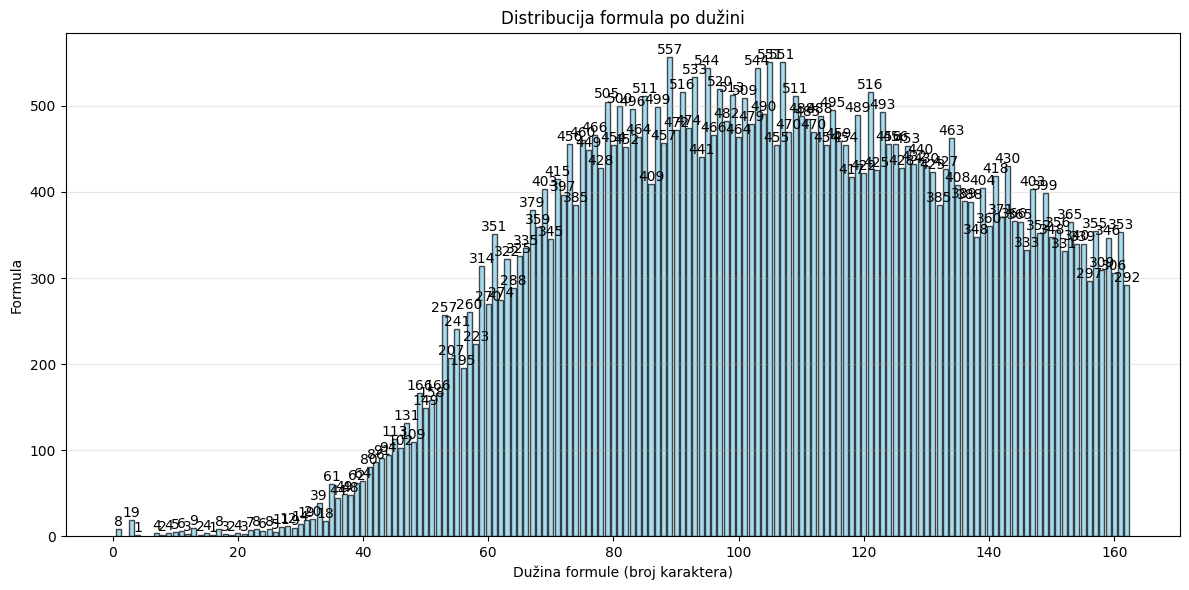

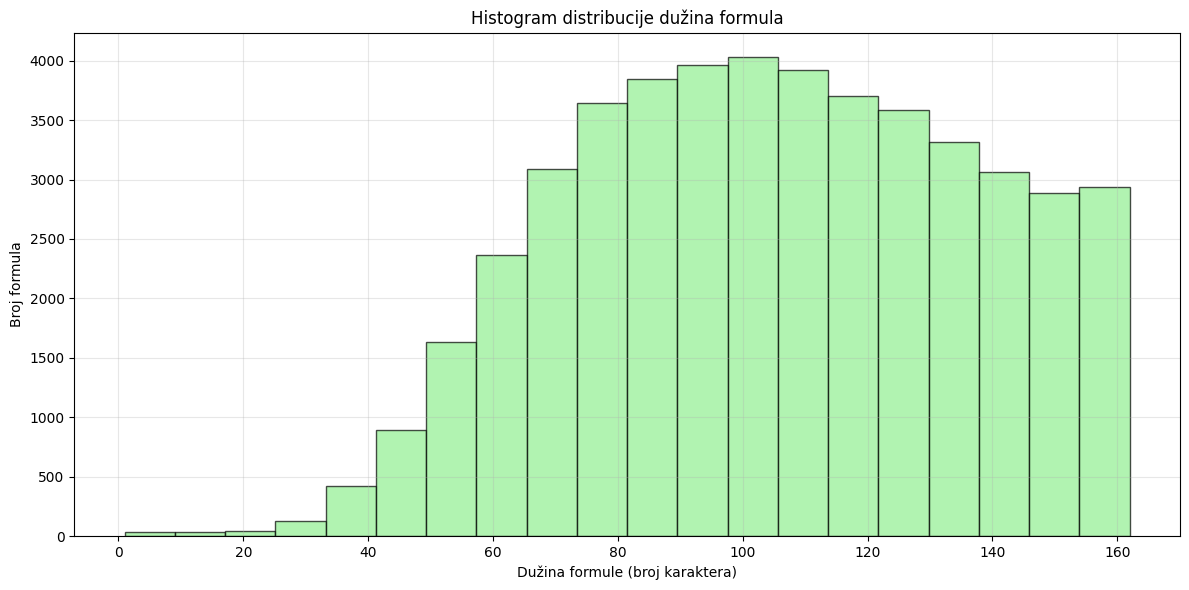


=== GRUPISANJE PO DUZINI ===
grupa_duzina
0-10         43
11-20        42
21-50      1628
51-100    19857
100+      25979
Name: count, dtype: int64


In [5]:
df = pd.read_csv('/content/data/im2latex_train.csv')

df['duzina_formule'] = df['formula'].astype(str).str.len()

print("=== STATISTIKA DUZINA FORMULA ===")
print(f"Ukupno formula: {len(df)}")
print(f"Prosečna dužina: {df['duzina_formule'].mean():.2f}")
print(f"Min dužina: {df['duzina_formule'].min()}")
print(f"Max dužina: {df['duzina_formule'].max()}")
print(f"Medijana: {df['duzina_formule'].median()}")

plt.figure(figsize=(12, 6))

# Grupisi po dužini i prebroj
duzina_counts = df['duzina_formule'].value_counts().sort_index()

plt.bar(duzina_counts.index, duzina_counts.values,
        color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Dužina formule (broj karaktera)')
plt.ylabel('Formula')
plt.title('Distribucija formula po dužini')
plt.grid(True, alpha=0.3, axis='y')

# Dodaj brojeve iznad barova
for i, v in enumerate(duzina_counts.values):
    plt.text(duzina_counts.index[i], v + 0.1, str(v),
             ha='center', va='bottom')

plt.tight_layout()
plt.show()


# 3. HISTOGRAM duzina formula
plt.figure(figsize=(12, 6))

plt.hist(df['duzina_formule'], bins=20, color='lightgreen',
         edgecolor='black', alpha=0.7)
plt.xlabel('Dužina formule (broj karaktera)')
plt.ylabel('Broj formula')
plt.title('Histogram distribucije dužina formula')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statisticki pregled po grupama duzina
print(f"\n=== GRUPISANJE PO DUZINI ===")
bins = [0, 10, 20, 50, 100, df['duzina_formule'].max()]
labels = ['0-10', '11-20', '21-50', '51-100', '100+']
df['grupa_duzina'] = pd.cut(df['duzina_formule'], bins=bins, labels=labels)

grupa_counts = df['grupa_duzina'].value_counts().sort_index()
print(grupa_counts)